In [1]:
import copy
import pylab
import random
import numpy as np
from environment import Env
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

EPISODES = 1000

Using TensorFlow backend.


In [2]:
class DeepSARSAgent:
    def __init__(self):
        self.load_model = False
        # 에이전트가 가능한 모든 행동 정의
        self.action_space = [0, 1, 2, 3, 4]
        # 상태의 크기와 행동의 크기 정의
        self.action_size = len(self.action_space)
        self.state_size = 15
        self.discount_factor = 0.99
        self.learning_rate = 0.001

        self.epsilon = 1.  # exploration
        self.epsilon_decay = .9999
        self.epsilon_min = 0.01
        self.model = self.build_model()

        if self.load_model:
            self.epsilon = 0.05
            self.model.load_weights('./save_model/deep_sarsa_trained.h5')

    # 상태가 입력 큐함수가 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(30, input_dim=self.state_size, activation='relu'))
        model.add(Dense(30, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # 입실론 탐욕 방법으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            # 무작위 행동 반환
            return random.randrange(self.action_size)
        else:
            # 모델로부터 행동 산출
            state = np.float32(state)
            q_values = self.model.predict(state)
            return np.argmax(q_values[0])

    def train_model(self, state, action, reward, next_state, next_action, done):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        state = np.float32(state)
        next_state = np.float32(next_state)
        target = self.model.predict(state)[0]
        # 살사의 큐함수 업데이트 식
        if done:
            target[action] = reward
        else:
            target[action] = (reward + self.discount_factor *
                              self.model.predict(next_state)[0][next_action])

        # 출력 값 reshape
        target = np.reshape(target, [1, 5])
        # 인공신경망 업데이트
        self.model.fit(state, target, epochs=1, verbose=0)

W0913 15:01:34.395547  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 15:01:34.409511  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 15:01:34.411505  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 15:01:34.465361  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 1,565
Trainable params: 1,565
Non-trainable params: 0
_________________________________________________________________


W0913 15:01:35.041824  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3005: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0913 15:01:35.047806  9868 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



episode: 0   score: -14 global_step 115   epsilon: 0.9885653037848035
episode: 1   score: -6 global_step 172   epsilon: 0.9829462301690663
episode: 2   score: -9 global_step 239   epsilon: 0.9763821763552903
episode: 3   score: -11 global_step 351   epsilon: 0.9655071659642745
episode: 4   score: -2 global_step 388   epsilon: 0.961941212232314
episode: 5   score: -4 global_step 410   epsilon: 0.9598271621689177
episode: 6   score: -56 global_step 806   epsilon: 0.9225589245386892
episode: 7   score: -3 global_step 866   epsilon: 0.9170398687593925
episode: 8   score: -1 global_step 891   epsilon: 0.9147500180990684
episode: 9   score: -21 global_step 1032   epsilon: 0.9019419117856019
episode: 10   score: -3 global_step 1082   epsilon: 0.8974432333577852
episode: 11   score: -5 global_step 1158   epsilon: 0.8906481789411322
episode: 12   score: 0 global_step 1172   epsilon: 0.8894020816563509
episode: 13   score: -9 global_step 1236   epsilon: 0.8837278016801113
episode: 14   score: 0 

episode: 116   score: -1 global_step 5059   epsilon: 0.6029474119910818
episode: 117   score: 1 global_step 5093   epsilon: 0.6009007697200509
episode: 118   score: -4 global_step 5168   epsilon: 0.5964106484406191
episode: 119   score: -1 global_step 5194   epsilon: 0.5948619175395045
episode: 120   score: -1 global_step 5225   epsilon: 0.5930206090310153
episode: 121   score: 1 global_step 5267   epsilon: 0.5905350215792848
episode: 122   score: 0 global_step 5284   epsilon: 0.5895319147688061
episode: 123   score: 0 global_step 5316   epsilon: 0.5876483337978837
episode: 124   score: -1 global_step 5348   epsilon: 0.5857707709528428
episode: 125   score: 1 global_step 5379   epsilon: 0.5839576027657769
episode: 126   score: 0 global_step 5411   epsilon: 0.5820918319723052
episode: 127   score: -3 global_step 5474   epsilon: 0.5784359986035422
episode: 128   score: 0 global_step 5488   epsilon: 0.5776267143717632
episode: 129   score: -1 global_step 5520   epsilon: 0.5757811710513242

episode: 231   score: -1 global_step 7716   epsilon: 0.4622550044115951
episode: 232   score: -1 global_step 7735   epsilon: 0.4613775099115248
episode: 233   score: 0 global_step 7760   epsilon: 0.4602254492086909
episode: 234   score: 1 global_step 7779   epsilon: 0.4593518073949324
episode: 235   score: -1 global_step 7800   epsilon: 0.4583881326275357
episode: 236   score: -1 global_step 7849   epsilon: 0.45614741298646105
episode: 237   score: 1 global_step 7866   epsilon: 0.45537258243479406
episode: 238   score: 1 global_step 7880   epsilon: 0.4547354750427254
episode: 239   score: -1 global_step 7900   epsilon: 0.45382686757186447
episode: 240   score: -2 global_step 7920   epsilon: 0.4529200755906263
episode: 241   score: 1 global_step 7934   epsilon: 0.45228639947725074
episode: 242   score: -4 global_step 7992   epsilon: 0.4496706007178857
episode: 243   score: 1 global_step 8014   epsilon: 0.44868236344323015
episode: 244   score: 1 global_step 8030   epsilon: 0.44796500982

episode: 346   score: 1 global_step 10110   epsilon: 0.3638365490120934
episode: 347   score: 1 global_step 10123   epsilon: 0.3633638451868548
episode: 348   score: 0 global_step 10138   epsilon: 0.362819180785831
episode: 349   score: 1 global_step 10149   epsilon: 0.36242027917766273
episode: 350   score: -1 global_step 10158   epsilon: 0.36209423136726465
episode: 351   score: 1 global_step 10167   epsilon: 0.36176847688254604
episode: 352   score: 0 global_step 10178   epsilon: 0.3613707304709577
episode: 353   score: 1 global_step 10208   epsilon: 0.3602881887760471
episode: 354   score: 1 global_step 10225   epsilon: 0.3596761886021545
episode: 355   score: 0 global_step 10246   epsilon: 0.3589216234479319
episode: 356   score: 1 global_step 10257   epsilon: 0.3585270070098219
episode: 357   score: 1 global_step 10272   epsilon: 0.35798959278958364
episode: 358   score: 0 global_step 10299   epsilon: 0.35702427638603107
episode: 359   score: 0 global_step 10315   epsilon: 0.3564

episode: 460   score: -1 global_step 12215   epsilon: 0.29476964883515044
episode: 461   score: 1 global_step 12230   epsilon: 0.29432780373594913
episode: 462   score: 1 global_step 12242   epsilon: 0.29397480456307895
episode: 463   score: 1 global_step 12261   epsilon: 0.29341675484657725
episode: 464   score: 1 global_step 12271   epsilon: 0.2931234700940665
episode: 465   score: 1 global_step 12283   epsilon: 0.29277191532697117
episode: 466   score: 1 global_step 12297   epsilon: 0.29236230096141674
episode: 467   score: 1 global_step 12320   epsilon: 0.29169060682831216
episode: 468   score: -1 global_step 12336   epsilon: 0.2912242517228215
episode: 469   score: 1 global_step 12352   epsilon: 0.29075864222613446
episode: 470   score: 1 global_step 12368   epsilon: 0.2902937771461714
episode: 471   score: 1 global_step 12383   epsilon: 0.28985864115687415
episode: 472   score: 1 global_step 12401   epsilon: 0.2893373388500768
episode: 473   score: 1 global_step 12413   epsilon: 

episode: 573   score: 1 global_step 14185   epsilon: 0.24205969014963455
episode: 574   score: 1 global_step 14195   epsilon: 0.2418177393573034
episode: 575   score: 1 global_step 14206   epsilon: 0.24155187280387508
episode: 576   score: 1 global_step 14216   epsilon: 0.24131042960043284
episode: 577   score: 1 global_step 14224   epsilon: 0.24111744881016114
episode: 578   score: 1 global_step 14234   epsilon: 0.24087643983527393
episode: 579   score: 1 global_step 14242   epsilon: 0.2406838061153215
episode: 580   score: 1 global_step 14256   epsilon: 0.24034706772143885
episode: 581   score: 1 global_step 14269   epsilon: 0.24003480393539173
episode: 582   score: 0 global_step 14282   epsilon: 0.23972294584879003
episode: 583   score: 1 global_step 14291   epsilon: 0.23950728147765293
episode: 584   score: 1 global_step 14308   epsilon: 0.23910044466623578
episode: 585   score: 1 global_step 14321   epsilon: 0.23878980051815096
episode: 586   score: 0 global_step 14333   epsilon: 

episode: 686   score: 1 global_step 16062   epsilon: 0.20063251750815334
episode: 687   score: 1 global_step 16072   epsilon: 0.20043197525120643
episode: 688   score: 0 global_step 16089   epsilon: 0.20009151334451972
episode: 689   score: 1 global_step 16103   epsilon: 0.19981156723630134
episode: 690   score: 0 global_step 16138   epsilon: 0.19911341432307827
episode: 691   score: -1 global_step 16168   epsilon: 0.19851693941560633
episode: 692   score: 1 global_step 16179   epsilon: 0.1982986799338171
episode: 693   score: 0 global_step 16192   epsilon: 0.1980410462661743
episode: 694   score: 1 global_step 16207   epsilon: 0.197744192549792
episode: 695   score: 0 global_step 16216   epsilon: 0.19756629394779854
episode: 696   score: 0 global_step 16232   epsilon: 0.1972504248464337
episode: 697   score: 0 global_step 16243   epsilon: 0.19703355783429652
episode: 698   score: 1 global_step 16254   epsilon: 0.19681692925663155
episode: 699   score: 1 global_step 16284   epsilon: 0.

episode: 799   score: 1 global_step 18019   epsilon: 0.16497025385400393
episode: 800   score: 1 global_step 18033   epsilon: 0.1647394455615067
episode: 801   score: 1 global_step 18044   epsilon: 0.1645583227509075
episode: 802   score: 1 global_step 18054   epsilon: 0.1643938384596583
episode: 803   score: 1 global_step 18064   epsilon: 0.16422951857870216
episode: 804   score: 1 global_step 18072   epsilon: 0.16409818093890874
episode: 805   score: 1 global_step 18127   epsilon: 0.16319807350220691
episode: 806   score: 1 global_step 18138   epsilon: 0.16301864535337263
episode: 807   score: 0 global_step 18146   epsilon: 0.16288827607318274
episode: 808   score: 1 global_step 18164   epsilon: 0.1625953262624464
episode: 809   score: 1 global_step 18182   epsilon: 0.1623029033133952
episode: 810   score: 1 global_step 18204   epsilon: 0.16194621159598466
episode: 811   score: 1 global_step 18214   epsilon: 0.16178433824075378
episode: 812   score: 1 global_step 18222   epsilon: 0.1

episode: 912   score: 1 global_step 19887   epsilon: 0.1368596348345355
episode: 913   score: 0 global_step 19902   epsilon: 0.13665448902264793
episode: 914   score: 0 global_step 19915   epsilon: 0.13647694473834654
episode: 915   score: 1 global_step 19925   epsilon: 0.13634052919185893
episode: 916   score: 1 global_step 19935   epsilon: 0.13620424999954722
episode: 917   score: 1 global_step 19945   epsilon: 0.13606810702511857
episode: 918   score: 1 global_step 19961   epsilon: 0.13585056125943346
episode: 919   score: 1 global_step 19974   epsilon: 0.13567406145439045
episode: 920   score: 1 global_step 19991   epsilon: 0.13544359997441546
episode: 921   score: 0 global_step 20007   epsilon: 0.13522705267095259
episode: 922   score: 0 global_step 20022   epsilon: 0.1350243540188416
episode: 923   score: 1 global_step 20044   epsilon: 0.1347276121384192
episode: 924   score: 1 global_step 20055   epsilon: 0.13457948584302803
episode: 925   score: 1 global_step 20068   epsilon: 0

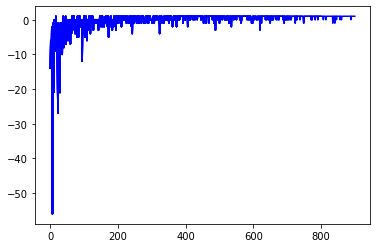

In [3]:
if __name__ == "__main__":
    # 환경과 에이전트 생성
    env = Env()
    agent = DeepSARSAgent()

    global_step = 0
    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, 15])

        while not done:
            # env 초기화
            global_step += 1

            # 현재 상태에 대한 행동 선택
            action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스텝 진행 후 샘플 수집
            next_state, reward, done = env.step(action)
            next_state = np.reshape(next_state, [1, 15])
            next_action = agent.get_action(next_state)
            # 샘플로 모델 학습
            agent.train_model(state, action, reward, next_state, next_action,
                              done)
            state = next_state
            score += reward

            state = copy.deepcopy(next_state)

            if done:
                # 에피소드마다 학습 결과 출력
                scores.append(score)
                episodes.append(e)
                if e%100 == 0:
                    pylab.plot(episodes, scores, 'b')
                    pylab.savefig("./graph/deep_sarsa_"+str(e)+".png")
                print("episode:", e, "  score:", score, "global_step",
                      global_step, "  epsilon:", agent.epsilon)

        # 100 에피소드마다 모델 저장
        if e % 100 == 0:
            agent.model.save_weights("./model/deep_sarsa_"+str(e)+".h5")